In [1]:
import pandas as pd
#pd.options.display.max_rows = 300
import numpy as np
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from numpy import NaN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import matplotlib as mpl

In [2]:
### Imporation de fitche Openfoodfacts

df=pd.read_csv('Openfood_data.csv','r',encoding='utf-8',delimiter='\t', low_memory=False, index_col=0)
df.head(1)

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Taille de data frame(df.shape)

print ("Le dataset compte {} lignes et {} variables".format(df.shape[0], df.shape[1]))

Le dataset compte 1811863 lignes et 185 variables


In [4]:
## Faire un copy de Dataframe

df_copy=df.copy()
df_copy.head(5)

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
list(df_copy.columns)

['url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_b

In [7]:
### # En utilisant la boucle for, je calcule les données manquantes pour les colonnes


colonnes_avec_nan=df_copy.columns[df_copy.isnull().any()]

for column in colonnes_avec_nan:
    
     print(column, df_copy[column].isnull().sum())

creator 4
product_name 78178
abbreviated_product_name 1805649
generic_name 1694681
quantity 1348084
packaging 1522749
packaging_tags 1522779
packaging_text 1807285
brands 873254
brands_tags 873312
categories 947556
categories_tags 947559
categories_en 947559
origins 1733566
origins_tags 1733688
origins_en 1733688
manufacturing_places 1696686
manufacturing_places_tags 1696737
labels 1414278
labels_tags 1414261
labels_en 1414261
emb_codes 1696766
emb_codes_tags 1696798
first_packaging_code_geo 1741080
cities 1811863
cities_tags 1735607
purchase_places 1659068
stores 1575537
countries 5571
countries_tags 5576
countries_en 5576
ingredients_text 1116233
allergens 1627392
allergens_en 1811863
traces 1715587
traces_tags 1692421
traces_en 1692421
serving_size 1335610
serving_quantity 1340352
no_nutriments 1811863
additives_n 1116232
additives 1811859
additives_tags 1409318
additives_en 1409318
ingredients_from_palm_oil_n 1116232
ingredients_from_palm_oil 1811863
ingredients_from_palm_oil_tags 

In [8]:
# Percentage des données manquantes par les colonnes



df_copy.isnull().sum()*100/len(df_copy)

url                    0.000000
creator                0.000221
created_t              0.000000
created_datetime       0.000000
last_modified_t        0.000000
                        ...    
choline_100g          99.996688
phylloquinone_100g    99.905512
beta-glucan_100g      99.998234
inositol_100g         99.996523
carnitine_100g        99.997903
Length: 185, dtype: float64

In [9]:

## EVITER les colonnes plus de 80 pourcentage de NAN

for column in colonnes_avec_nan: 
    
    if df_copy[column].isnull().sum()*100.0/len(df_copy) > 80:
          
            df_copy.drop(column,1, inplace=True)

In [10]:

df_copy.head(5)

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56,NaN
0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,...,3661.0,15.1,6.10,2.6,1.0,NaN,15.7,2.1,0.84,NaN
0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,courte-paille,...,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.6,1.84,18.0


In [11]:

## Data types des colonnes. Sauf les colonnes de "Date time", l'autres colonnes sont de types propres

df_copy.dtypes


url                                         object
creator                                     object
created_t                                    int64
created_datetime                            object
last_modified_t                              int64
last_modified_datetime                      object
product_name                                object
quantity                                    object
brands                                      object
brands_tags                                 object
categories                                  object
categories_tags                             object
categories_en                               object
labels                                      object
labels_tags                                 object
labels_en                                   object
countries                                   object
countries_tags                              object
countries_en                                object
ingredients_text               

In [12]:
# Taille de DF

df_copy.shape

(1811863, 56)

In [13]:
df1=df_copy.dropna(subset=["product_name","pnns_groups_2"])

print(f"Forme des données avant nettoyage {df_copy.shape}")
print(f"Forme des données après nettoyage {df1.shape}")
print(f"j'efface {df_copy.shape[0]- df1.shape[0]} lignes")

df1

Forme des données avant nettoyage (1811863, 56)
Forme des données après nettoyage (1733685, 56)
j'efface 78178 lignes


,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN
0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,NaN,...,3661.0,15.1,6.10,2.6,1.0,NaN,15.7,2.10,0.840,NaN
0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,courte-paille,...,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,Pagès,pages,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,Fati,440 g,NaN,NaN,...,100.0,0.3,0.00,2.4,0.6,NaN,1.6,0.64,0.256,NaN


In [14]:
df1 = df1[df1['pnns_groups_2']!='unknown']
df1.head(2)

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,brands_tags,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,courte-paille,...,936.0,8.2,2.2,29.0,22.0,0.0,5.1,4.60,1.840,18.0
0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,NaN,...,134.0,0.3,0.1,5.3,3.9,NaN,0.9,0.42,0.168,1.0


In [15]:
df1.shape

(697646, 56)

In [16]:
# Changez le valuer du 'product _name 'et 'pnns_groups_2' en minuscules pour plus d'uniformité
df1['product_name']=df1['product_name'].str.lower()
df1['pnns_groups_2']=df1['pnns_groups_2'].str.lower()

<ipython-input-16-5f9810a40dea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['product_name']=df1['product_name'].str.lower()
<ipython-input-16-5f9810a40dea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pnns_groups_2']=df1['pnns_groups_2'].str.lower()


In [17]:
# sélectionner les colonnes pertinentes pour l'idée d'applications

df1=df1[['product_name','pnns_groups_2','nutrition-score-fr_100g','energy-kcal_100g',"sugars_100g","carbohydrates_100g","saturated-fat_100g","fat_100g",'proteins_100g','fiber_100g','sodium_100g','salt_100g' ]]
df1.head(2)

,product_name,pnns_groups_2,nutrition-score-fr_100g,energy-kcal_100g,sugars_100g,carbohydrates_100g,saturated-fat_100g,fat_100g,proteins_100g,fiber_100g,sodium_100g,salt_100g
code,,,,,,,,,,,,
0000000000100,moutarde au moût de raisin,dressings and sauces,18.0,NaN,22.0,29.0,2.2,8.2,5.1,0.0,1.840,4.60
0000000000949,salade de carottes râpées,one-dish meals,1.0,32.0,3.9,5.3,0.1,0.3,0.9,NaN,0.168,0.42


In [18]:
### Je decoupe les OUTLIER en utlisent le Method IQR


Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.head(5)



,product_name,pnns_groups_2,nutrition-score-fr_100g,energy-kcal_100g,sugars_100g,carbohydrates_100g,saturated-fat_100g,fat_100g,proteins_100g,fiber_100g,sodium_100g,salt_100g
code,,,,,,,,,,,,
0000000000949,salade de carottes râpées,one-dish meals,1.0,32.0,3.9,5.3,0.1,0.3,0.9,NaN,0.168,0.42
0000000001281,tarte noix de coco,biscuits and cakes,14.0,381.0,21.9,27.3,15.5,22.0,4.6,4.4,0.040,0.10
0000000001885,compote de poire,fruits,-2.0,157.0,27.0,36.0,0.0,0.0,0.6,3.6,0.000,0.00
0000000002103,aiguillettes de poulet,meat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000002257,salade de macedoine de légumes,one-dish meals,1.0,143.0,1.0,3.9,1.0,12.7,1.9,NaN,0.108,0.27


In [19]:
df1.shape

(533922, 12)

In [20]:
## Pour reset le index

df1.reset_index(inplace=True)

### Traitement les données manquantes en utlisent IterativeImputer

#### Étape 1 : j'ai effectué une régression multiple en utilisant des colonnes numériques pour découvrir la relation entre les colonnes

#### Method 1:  Régression multiple avec Statsmodels

In [21]:
# Je préfer statsmodels que skilearn et j'ai choisi Le premier effectue la régression malgré la présence de Nan.

# Régression de "salt_100g" sur l'autres variables

# "salt_100g" et "Sodium_100g" sont associés

x = df1[['sodium_100g','energy-kcal_100g',"sugars_100g","carbohydrates_100g","saturated-fat_100g","fat_100g",'proteins_100g','fiber_100g']]

y=df1['salt_100g']

x = sm.add_constant(x)

model = sm.OLS(y, x, missing='drop')

results = model.fit()

results.params



const                 1.651470e-05
sodium_100g           2.499928e+00
energy-kcal_100g     -9.056463e-09
sugars_100g           6.734223e-07
carbohydrates_100g   -2.918065e-07
saturated-fat_100g   -2.368746e-06
fat_100g              1.709726e-06
proteins_100g        -2.508423e-08
fiber_100g           -1.623550e-06
dtype: float64

In [22]:

## Régression de ""carbohydrates_100g " sur l'autres variables

# "carbohydrates_100g" et "Sodium_100g" sont associés


x = df1[['sodium_100g','salt_100g','energy-kcal_100g',"sugars_100g","saturated-fat_100g","fat_100g",'proteins_100g','fiber_100g']]


y=df1["carbohydrates_100g"]

x = sm.add_constant(x)

model = sm.OLS(y, x, missing='drop')

results = model.fit()

results.params



const                -0.197806
sodium_100g           6.784343
salt_100g            -2.705906
energy-kcal_100g      0.223018
sugars_100g           0.146366
saturated-fat_100g   -0.109828
fat_100g             -1.946182
proteins_100g        -0.820635
fiber_100g            0.476855
dtype: float64

In [23]:

##  Régression de "fat_100g" sur les autres variables
    
## "fat_100g" a Une fort association avec "Saturated fat_100g"


x = df1[['sodium_100g','energy-kcal_100g',"sugars_100g","carbohydrates_100g","saturated-fat_100g",'proteins_100g','fiber_100g']]

y=df1["fat_100g"]

x = sm.add_constant(x)

model = sm.OLS(y, x, missing='drop')

results = model.fit()

results.params

const                -0.430407
sodium_100g           1.088593
energy-kcal_100g      0.089896
sugars_100g           0.007163
carbohydrates_100g   -0.352556
saturated-fat_100g    0.346688
proteins_100g        -0.337438
fiber_100g            0.109887
dtype: float64

In [24]:

##  Regression de "sugar_100g" sur les autres variables
    
## Une fort negative association avec "Sodium_100g"

x = df1[['sodium_100g',"fat_100g",'energy-kcal_100g',"carbohydrates_100g","saturated-fat_100g",'proteins_100g','fiber_100g']]

y=df1["sugars_100g"]

x = sm.add_constant(x)

model = sm.OLS(y, x, missing='drop')

results = model.fit()

results.params

const                 6.045667
sodium_100g          -4.971770
fat_100g              0.058806
energy-kcal_100g      0.004623
carbohydrates_100g    0.217685
saturated-fat_100g    0.706713
proteins_100g        -0.593571
fiber_100g           -0.520133
dtype: float64

In [25]:

## Regression de "proteins_100g" sur les autres variables
##  Protiens_100g est associé avec Sodium_100g

x = df1[['sodium_100g',"fat_100g",'energy-kcal_100g',"carbohydrates_100g","sugars_100g","saturated-fat_100g",'fiber_100g']]

y=df1['proteins_100g']

x = sm.add_constant(x)

model = sm.OLS(y, x,missing='drop')

results = model.fit()

results.params



const                 2.628247
sodium_100g           2.413940
fat_100g             -0.701912
energy-kcal_100g      0.085148
carbohydrates_100g   -0.309230
sugars_100g          -0.150387
saturated-fat_100g    0.263795
fiber_100g            0.092091
dtype: float64

#### Method 2: Coefficient de corrélation

In [26]:
df_corrélation=df1[['sodium_100g','proteins_100g','salt_100g', "fat_100g","carbohydrates_100g","sugars_100g","saturated-fat_100g",'fiber_100g']]
df_corrélation.head(1)

,sodium_100g,proteins_100g,salt_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,fiber_100g
0,0.168,0.9,0.42,0.3,5.3,3.9,0.1,NaN


In [27]:

df_cor=df_corrélation.corr()
df_cor

,sodium_100g,proteins_100g,salt_100g,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,fiber_100g
sodium_100g,1.000000,0.397477,0.999968,0.334374,-0.073069,-0.202814,0.224938,-0.025952
proteins_100g,0.397477,1.000000,0.397461,0.365529,-0.093023,-0.277996,0.323834,0.076208
salt_100g,0.999968,0.397461,1.000000,0.334375,-0.073075,-0.202786,0.224944,-0.025941
fat_100g,0.334374,0.365529,0.334375,1.000000,0.093592,0.157254,0.759397,0.113277
carbohydrates_100g,-0.073069,-0.093023,-0.073075,0.093592,1.000000,0.533811,0.040573,0.464982
sugars_100g,-0.202814,-0.277996,-0.202786,0.157254,0.533811,1.000000,0.206222,0.134913
saturated-fat_100g,0.224938,0.323834,0.224944,0.759397,0.040573,0.206222,1.000000,-0.049792
fiber_100g,-0.025952,0.076208,-0.025941,0.113277,0.464982,0.134913,-0.049792,1.000000


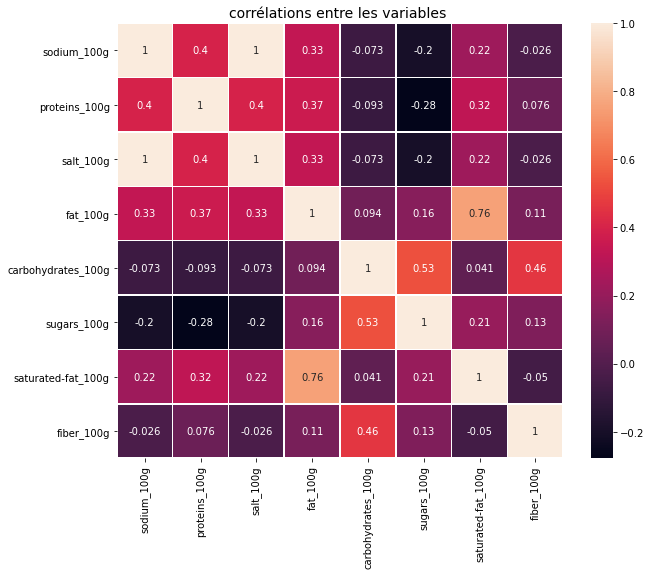

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cor,annot=True,linewidth=0.5)
plt.title('corrélations entre les variables ',fontsize=14)
plt.show()

#### En effet, Je trouve que les cofficient de correlation est plus intutitif concernants les relation linear entre les colonnes.

### Étape2. En utilisant IterativeImputer , Les Nan sont remplir de chaque colonne numérique

In [29]:
## Le Traitementdes colonnes Sodium et Salt 

df_salt=df1[['sodium_100g','salt_100g']]
df_salt

,sodium_100g,salt_100g
0,0.168,0.42
1,0.040,0.10
2,0.000,0.00
3,NaN,NaN
4,0.108,0.27
...,...,...
533917,NaN,NaN
533918,NaN,NaN
533919,0.112,0.28
533920,0.072,0.18


In [30]:
### L'operation d'IterativeImputer 

imp = IterativeImputer(max_iter=10, verbose=0)
imp.fit(df_salt)
df_salt_imp = imp.transform(df_salt)
df_salt_imp = pd.DataFrame(df_salt_imp, columns=df_salt.columns)

In [31]:
df_salt_imp

,sodium_100g,salt_100g
0,0.168000,0.420000
1,0.040000,0.100000
2,0.000000,0.000000
3,0.310797,0.776992
4,0.108000,0.270000
...,...,...
533917,0.310797,0.776992
533918,0.310797,0.776992
533919,0.112000,0.280000
533920,0.072000,0.180000


In [32]:
## Verifier les Nan sont traités

df_salt_imp.isnull().sum()


sodium_100g    0
salt_100g      0
dtype: int64

In [33]:
## Le Traitement des colonnes "Sugars" et "Carbohydrates"

df_carb=df1[["sugars_100g","carbohydrates_100g"]]
df_carb

,sugars_100g,carbohydrates_100g
0,3.9,5.3
1,21.9,27.3
2,27.0,36.0
3,NaN,NaN
4,1.0,3.9
...,...,...
533917,NaN,NaN
533918,NaN,NaN
533919,24.0,35.0
533920,0.0,0.0


In [34]:
## L'operation d'IterativeImputer 

imp = IterativeImputer(max_iter=10, verbose=0)

imp.fit(df_carb)

df_carb_imp = imp.transform(df_carb)

df_carb_imp = pd.DataFrame(df_carb_imp, columns=df_carb.columns)

In [35]:
# Les NAN sont traités

df_carb_imp

,sugars_100g,carbohydrates_100g
0,3.90000,5.300000
1,21.90000,27.300000
2,27.00000,36.000000
3,8.43499,23.470769
4,1.00000,3.900000
...,...,...
533917,8.43499,23.470769
533918,8.43499,23.470769
533919,24.00000,35.000000
533920,0.00000,0.000000


In [36]:
# La som de Nan est zero

df_carb_imp.isnull().sum()

sugars_100g           0
carbohydrates_100g    0
dtype: int64

In [37]:
## Le Traitementdes colonnes"saturated-fat" et "fat"


df_fat=df1[["saturated-fat_100g","fat_100g"]]

df_fat

,saturated-fat_100g,fat_100g
0,0.1,0.3
1,15.5,22.0
2,0.0,0.0
3,NaN,NaN
4,1.0,12.7
...,...,...
533917,NaN,NaN
533918,NaN,NaN
533919,4.8,7.6
533920,2.3,5.0


In [38]:
## L'operation d'IterativeImputer 

imp = IterativeImputer(max_iter=10, verbose=0)

imp.fit(df_fat)

df_fat_imp = imp.transform(df_fat)

df_fat_imp = pd.DataFrame(df_fat_imp, columns=df_fat.columns)

In [39]:
df_fat_imp

,saturated-fat_100g,fat_100g
0,0.100000,0.300000
1,15.500000,22.000000
2,0.000000,0.000000
3,3.560517,9.732181
4,1.000000,12.700000
...,...,...
533917,3.560517,9.732181
533918,3.560517,9.732181
533919,4.800000,7.600000
533920,2.300000,5.000000


In [40]:
# La som de NAN

df_fat_imp.isnull().sum()

saturated-fat_100g    0
fat_100g              0
dtype: int64

In [41]:
## Le Traitementdes colonnes"proteins"

df_pro = df1[['sodium_100g','salt_100g','proteins_100g']]
df_pro

,sodium_100g,salt_100g,proteins_100g
0,0.168,0.42,0.9
1,0.040,0.10,4.6
2,0.000,0.00,0.6
3,NaN,NaN,NaN
4,0.108,0.27,1.9
...,...,...,...
533917,NaN,NaN,NaN
533918,NaN,NaN,NaN
533919,0.112,0.28,2.6
533920,0.072,0.18,21.5


In [42]:
imp = IterativeImputer(max_iter=10, verbose=0)

imp.fit(df_pro)

df_pro_imp = imp.transform(df_pro)

df_pro_imp = pd.DataFrame(df_pro_imp, columns=df_pro.columns)

In [43]:
df_pro_imp

,sodium_100g,salt_100g,proteins_100g
0,0.168000,0.420000,0.900000
1,0.040000,0.100000,4.600000
2,0.000000,0.000000,0.600000
3,0.310797,0.776992,7.547035
4,0.108000,0.270000,1.900000
...,...,...,...
533917,0.310797,0.776992,7.547035
533918,0.310797,0.776992,7.547035
533919,0.112000,0.280000,2.600000
533920,0.072000,0.180000,21.500000


In [44]:
df_pro_imp2=df_pro_imp.drop(columns=['sodium_100g','salt_100g'], axis=1)
df_pro_imp2

,proteins_100g
0,0.900000
1,4.600000
2,0.600000
3,7.547035
4,1.900000
...,...
533917,7.547035
533918,7.547035
533919,2.600000
533920,21.500000


In [45]:
## Le Traitementdes colonnes"fiber"

df_fiber = df1[['carbohydrates_100g','fiber_100g']]
df_fiber

,carbohydrates_100g,fiber_100g
0,5.3,NaN
1,27.3,4.4
2,36.0,3.6
3,NaN,NaN
4,3.9,NaN
...,...,...
533917,NaN,NaN
533918,NaN,NaN
533919,35.0,NaN
533920,0.0,NaN


In [46]:
imp = IterativeImputer(max_iter=10, verbose=0)

imp.fit(df_fiber)

df_fib_imp = imp.transform(df_fiber)

df_fib_imp = pd.DataFrame(df_fib_imp, columns=df_fiber.columns)

In [47]:
df_fib_imp

,carbohydrates_100g,fiber_100g
0,5.300000,1.016142
1,27.300000,4.400000
2,36.000000,3.600000
3,23.472324,1.658680
4,3.900000,0.966641
...,...,...
533917,23.472324,1.658680
533918,23.472324,1.658680
533919,35.000000,2.066277
533920,0.000000,0.828745


In [48]:
df_fib_imp2=df_fib_imp.drop(columns=['carbohydrates_100g'],axis=1)
df_fib_imp2

,fiber_100g
0,1.016142
1,4.400000
2,3.600000
3,1.658680
4,0.966641
...,...
533917,1.658680
533918,1.658680
533919,2.066277
533920,0.828745


In [49]:
## J'ai concaténé les colonnes transformées et supprimé les anciennes colonnes respectives

df2=df1.drop(['sodium_100g','salt_100g',"sugars_100g","carbohydrates_100g","saturated-fat_100g","fat_100g",'proteins_100g','fiber_100g'],axis=1)

df2=pd.concat([df2,df_carb_imp,df_pro_imp2,df_fib_imp2, df_fat_imp,df_salt_imp],axis=1)

df2.head(5)

,code,product_name,pnns_groups_2,nutrition-score-fr_100g,energy-kcal_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,saturated-fat_100g,fat_100g,sodium_100g,salt_100g
0,0000000000949,salade de carottes râpées,one-dish meals,1.0,32.0,3.90000,5.300000,0.900000,1.016142,0.100000,0.300000,0.168000,0.420000
1,0000000001281,tarte noix de coco,biscuits and cakes,14.0,381.0,21.90000,27.300000,4.600000,4.400000,15.500000,22.000000,0.040000,0.100000
2,0000000001885,compote de poire,fruits,-2.0,157.0,27.00000,36.000000,0.600000,3.600000,0.000000,0.000000,0.000000,0.000000
3,0000000002103,aiguillettes de poulet,meat,NaN,NaN,8.43499,23.470769,7.547035,1.658680,3.560517,9.732181,0.310797,0.776992
4,0000000002257,salade de macedoine de légumes,one-dish meals,1.0,143.0,1.00000,3.900000,1.900000,0.966641,1.000000,12.700000,0.108000,0.270000


### Traitment les NAN de colonne 'energy-kcal_100g' avec une formule

In [50]:

# 1kcal=1calorie. Donc, pas besoin de convertir par*1000.

# 1kcal=4.18kj. La colonne 'Energy_100g' représente 'Energy_kj_100g'. 

# j'utilise 'energy-kcal_100g' comme mesure de calorie pour 100g.

df2['energy-kcal_100g']=df2['energy-kcal_100g'].fillna(4*df2['carbohydrates_100g']+ 4*df2['proteins_100g']+9*df2['fat_100g'])

df2['energy-kcal_100g']

0          32.000000
1         381.000000
2         157.000000
3         211.660842
4         143.000000
             ...    
533917    211.660842
533918    211.660842
533919    218.800000
533920    131.000000
533921    211.660842
Name: energy-kcal_100g, Length: 533922, dtype: float64

### Traitment Les Nan de "nutrition-score-fr" avec les colonnes pertinents avec IterativeImputer.

In [51]:

### L'objectif est de traiter les Nan dans Nutrution_score en utilisants IterativeImputer
## Les Nan d'autres colonnes sont zero sauf le colonne "nutrition-score-fr"

df_nutri=df2[['saturated-fat_100g','energy-kcal_100g','sugars_100g','salt_100g','proteins_100g','fiber_100g','nutrition-score-fr_100g']]
df_nutri

,saturated-fat_100g,energy-kcal_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,nutrition-score-fr_100g
0,0.100000,32.000000,3.90000,0.420000,0.900000,1.016142,1.0
1,15.500000,381.000000,21.90000,0.100000,4.600000,4.400000,14.0
2,0.000000,157.000000,27.00000,0.000000,0.600000,3.600000,-2.0
3,3.560517,211.660842,8.43499,0.776992,7.547035,1.658680,NaN
4,1.000000,143.000000,1.00000,0.270000,1.900000,0.966641,1.0
...,...,...,...,...,...,...,...
533917,3.560517,211.660842,8.43499,0.776992,7.547035,1.658680,NaN
533918,3.560517,211.660842,8.43499,0.776992,7.547035,1.658680,NaN
533919,4.800000,218.800000,24.00000,0.280000,2.600000,2.066277,12.0
533920,2.300000,131.000000,0.00000,0.180000,21.500000,0.828745,-2.0


In [52]:
df_nutri.isnull().sum()

saturated-fat_100g              0
energy-kcal_100g                0
sugars_100g                     0
salt_100g                       0
proteins_100g                   0
fiber_100g                      0
nutrition-score-fr_100g    115921
dtype: int64

In [53]:
## L'operation d'IterativeImputer

imp = IterativeImputer(max_iter=10)

imp.fit(df_nutri)

df_nutri_score = imp.transform(df_nutri)

df_nutri_score = pd.DataFrame(df_nutri_score, columns=df_nutri.columns)

In [54]:
# Les NAN de Nutri_score sont treatés

df_nutri_score

,saturated-fat_100g,energy-kcal_100g,sugars_100g,salt_100g,proteins_100g,fiber_100g,nutrition-score-fr_100g
0,0.100000,32.000000,3.90000,0.420000,0.900000,1.016142,1.000000
1,15.500000,381.000000,21.90000,0.100000,4.600000,4.400000,14.000000
2,0.000000,157.000000,27.00000,0.000000,0.600000,3.600000,-2.000000
3,3.560517,211.660842,8.43499,0.776992,7.547035,1.658680,6.851574
4,1.000000,143.000000,1.00000,0.270000,1.900000,0.966641,1.000000
...,...,...,...,...,...,...,...
533917,3.560517,211.660842,8.43499,0.776992,7.547035,1.658680,6.851574
533918,3.560517,211.660842,8.43499,0.776992,7.547035,1.658680,6.851574
533919,4.800000,218.800000,24.00000,0.280000,2.600000,2.066277,12.000000
533920,2.300000,131.000000,0.00000,0.180000,21.500000,0.828745,-2.000000


In [55]:
## sélectioner la colonne 'nutrition-score'

df_nutri_imp=df_nutri_score['nutrition-score-fr_100g']
df_nutri_imp.head(2)

0     1.0
1    14.0
Name: nutrition-score-fr_100g, dtype: float64

In [56]:
### Je supprimé les ancien colonne 

df3=df2.drop(['nutrition-score-fr_100g'],axis=1)

# J'ai concaténé le colonne 'nutrition-score-fr_100g' transformé 
df3=pd.concat([df3,df_nutri_imp],axis=1)

df3.head(2)


,code,product_name,pnns_groups_2,energy-kcal_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,saturated-fat_100g,fat_100g,sodium_100g,salt_100g,nutrition-score-fr_100g
0,0000000000949,salade de carottes râpées,one-dish meals,32.0,3.9,5.3,0.9,1.016142,0.1,0.3,0.168,0.42,1.0
1,0000000001281,tarte noix de coco,biscuits and cakes,381.0,21.9,27.3,4.6,4.400000,15.5,22.0,0.040,0.10,14.0


In [57]:
# La som des NAN dans le DF est zero

df3.isnull().sum().sum()

0

In [58]:
df3.shape

(533922, 13)

### Traitment de DOUBLON

In [59]:
sum(df3.duplicated())

2

In [60]:
df4=df3.drop_duplicates()
df4.head(5)

,code,product_name,pnns_groups_2,energy-kcal_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,saturated-fat_100g,fat_100g,sodium_100g,salt_100g,nutrition-score-fr_100g
0,0000000000949,salade de carottes râpées,one-dish meals,32.000000,3.90000,5.300000,0.900000,1.016142,0.100000,0.300000,0.168000,0.420000,1.000000
1,0000000001281,tarte noix de coco,biscuits and cakes,381.000000,21.90000,27.300000,4.600000,4.400000,15.500000,22.000000,0.040000,0.100000,14.000000
2,0000000001885,compote de poire,fruits,157.000000,27.00000,36.000000,0.600000,3.600000,0.000000,0.000000,0.000000,0.000000,-2.000000
3,0000000002103,aiguillettes de poulet,meat,211.660842,8.43499,23.470769,7.547035,1.658680,3.560517,9.732181,0.310797,0.776992,6.851574
4,0000000002257,salade de macedoine de légumes,one-dish meals,143.000000,1.00000,3.900000,1.900000,0.966641,1.000000,12.700000,0.108000,0.270000,1.000000


### Traitement des valuers atypique

In [61]:
# Supprimer les ligne avec de valuer 100 dans les colonnes de 100g

g_per_100g_colonnes = ['proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','salt_100g',
                       'sodium_100g','saturated-fat_100g','fiber_100g']
df4 = df4[~(df4[g_per_100g_colonnes] > 100).any(axis=1)]
df4.head(1)

,code,product_name,pnns_groups_2,energy-kcal_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,saturated-fat_100g,fat_100g,sodium_100g,salt_100g,nutrition-score-fr_100g
0,0000000000949,salade de carottes râpées,one-dish meals,32.0,3.9,5.3,0.9,1.016142,0.1,0.3,0.168,0.42,1.0


In [62]:
# les valeurs de saturated-fat_100g ne peuvent pas être supérieurs à fat_100g, 

# de même pour les valeurs de sodium_100g qui ne peuvent pas être supérieurs à salt_100g.


df4 = df4[~((df4['saturated-fat_100g'] > df4['fat_100g']) 
                                | (df4['sodium_100g'] > df4['salt_100g']))]

df4.head(1)

,code,product_name,pnns_groups_2,energy-kcal_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,saturated-fat_100g,fat_100g,sodium_100g,salt_100g,nutrition-score-fr_100g
0,0000000000949,salade de carottes râpées,one-dish meals,32.0,3.9,5.3,0.9,1.016142,0.1,0.3,0.168,0.42,1.0


In [63]:
# supprimer toutes les lignes dont la variable est supérieur à 900 kcal/100g pour l'energy_kcal_100g

df4 = df4[~(df4['energy-kcal_100g'] > 900)]
df4.head(1)

,code,product_name,pnns_groups_2,energy-kcal_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,saturated-fat_100g,fat_100g,sodium_100g,salt_100g,nutrition-score-fr_100g
0,0000000000949,salade de carottes râpées,one-dish meals,32.0,3.9,5.3,0.9,1.016142,0.1,0.3,0.168,0.42,1.0


In [78]:
## Eviter la colonne 'Code'

df5=df4[['product_name','pnns_groups_2','nutrition-score-fr_100g','energy-kcal_100g','sugars_100g','carbohydrates_100g','proteins_100g','fiber_100g','saturated-fat_100g','fat_100g','salt_100g','sodium_100g']]
df5.head(1)


,product_name,pnns_groups_2,nutrition-score-fr_100g,energy-kcal_100g,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,saturated-fat_100g,fat_100g,salt_100g,sodium_100g
0,salade de carottes râpées,one-dish meals,1.0,32.0,3.9,5.3,0.9,1.016142,0.1,0.3,0.42,0.168


In [79]:
# Attribué 'product_name' comme indice

df5=df5.set_index('product_name')

In [80]:
df5.shape

(514379, 11)

In [81]:
# J'ai rénomé quelqes colonnés et lignes

df5 =df5.rename(columns={'nutrition-score-fr_100g':'nutri_score','energy-kcal_100g':'energy_kcal'},index={'filets de poulet':'filet de poulet', 'ketchup':'tomato ketchup','escalopes de dinde':'escalope de dinde'})
df5.head(2)           

,pnns_groups_2,nutri_score,energy_kcal,sugars_100g,carbohydrates_100g,proteins_100g,fiber_100g,saturated-fat_100g,fat_100g,salt_100g,sodium_100g
product_name,,,,,,,,,,,
salade de carottes râpées,one-dish meals,1.0,32.0,3.9,5.3,0.9,1.016142,0.1,0.3,0.42,0.168
tarte noix de coco,biscuits and cakes,14.0,381.0,21.9,27.3,4.6,4.400000,15.5,22.0,0.10,0.040


In [82]:
df5.isnull().sum().sum()

0

In [83]:
df5.shape

(514379, 11)

In [84]:
# j'ai réinitialisé l'index

df5=df5.reset_index()

### Sauguardé les données nettoyée pour la visualisation 

In [85]:

df5.to_csv("open_food_facts_clean1",index=False)